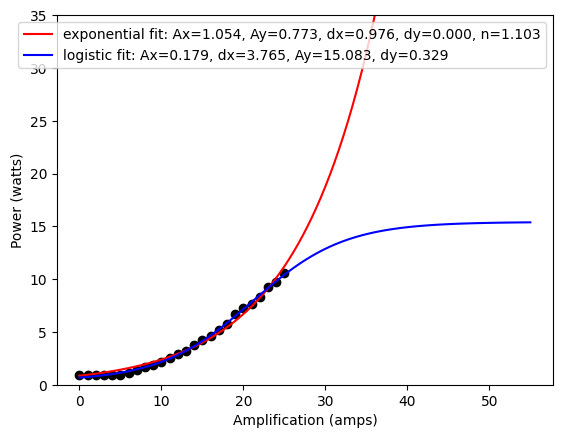

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
file = r"C:\Users\marku\Desktop\Code\Beam power data\beam power vs ampcut.txt"

df = pd.read_csv(file)
df.head

amps = df["amps"].values
amps_cont = np.linspace(amps[0],55,100)
watts = df["watts"].values
watts_cont = np.linspace(watts[0],watts[-1],100)

plt.scatter(amps,watts,color='black')
plt.xlabel('Amplification (amps)')
plt.ylabel('Power (watts)')

def exponential(x,Ax,Ay,dx,dy,n):
    return Ay*n**(Ax*x + dx) + dy

def logistic(x, Ax, dx, Ay, dy):
    return Ay * (1/(1+np.exp(-Ax*x + dx))) + dy

bounds_lower = [-np.inf, -np.inf, -np.inf, 0, -np.inf]
bounds_upper = [np.inf, np.inf, np.inf, np.inf, np.inf]


popt, pcov = curve_fit(exponential, amps, watts, bounds=(bounds_lower, bounds_upper))

plt.plot(amps_cont, exponential(amps_cont, *popt), 'r-',
         label='exponential fit: Ax=%5.3f, Ay=%5.3f, dx=%5.3f, dy=%5.3f, n=%5.3f' % tuple(popt))

bounds_lower = [0, -np.inf, -np.inf, -np.inf]
bounds_upper = [np.inf, np.inf, np.inf, np.inf]

popt, pcov = curve_fit(logistic, amps, watts, bounds=(bounds_lower, bounds_upper))

plt.plot(amps_cont, logistic(amps_cont, *popt), 'b-',
         label='logistic fit: Ax=%5.3f, dx=%5.3f, Ay=%5.3f, dy=%5.3f' % tuple(popt))
plt.legend()
plt.ylim(0,35)

plt.show()

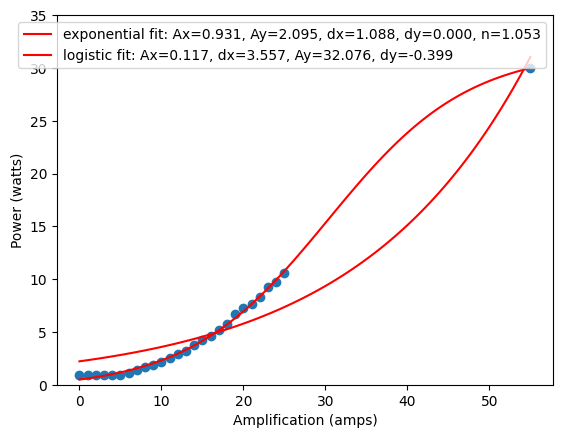

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
file = r"C:\Users\marku\Desktop\Code\Beam power data\beam power vs ampcut_ext.txt"

df = pd.read_csv(file)
df.head

amps = df["amps"].values
amps_cont = np.linspace(amps[0],55,100)
watts = df["watts"].values
watts_cont = np.linspace(watts[0],watts[-1],100)

plt.scatter(amps,watts)
plt.xlabel('Amplification (amps)')
plt.ylabel('Power (watts)')

def exponential(x,Ax,Ay,dx,dy,n):
    return Ay*n**(Ax*x + dx) + dy

def logistic(x, Ax, dx, Ay, dy):
    return Ay * (1/(1+np.exp(-Ax*x + dx))) + dy

bounds_lower = [-np.inf, -np.inf, -np.inf, 0, -np.inf]
bounds_upper = [np.inf, np.inf, np.inf, np.inf, np.inf]


popt, pcov = curve_fit(exponential, amps, watts, bounds=(bounds_lower, bounds_upper))

plt.plot(amps_cont, exponential(amps_cont, *popt), 'r-',
         label='exponential fit: Ax=%5.3f, Ay=%5.3f, dx=%5.3f, dy=%5.3f, n=%5.3f' % tuple(popt))

bounds_lower = [0, -np.inf, -np.inf, -np.inf]
bounds_upper = [np.inf, np.inf, np.inf, np.inf]

popt, pcov = curve_fit(logistic, amps, watts, bounds=(bounds_lower, bounds_upper))

plt.plot(amps_cont, logistic(amps_cont, *popt), 'r-',
         label='logistic fit: Ax=%5.3f, dx=%5.3f, Ay=%5.3f, dy=%5.3f' % tuple(popt))
plt.legend()
plt.ylim(0,35)

plt.show()